In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
# Read in the Data 

df = pd.read_csv('Movie_data.csv')

In [2]:
# Glance at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
# Going to check for missing data

for col in df.columns:
    pct_missing =np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# I would normally not drop any data but for this project i will be droping any row that has any missing data.
# soley because i dont have to data to replace what is missing
# We also have to make sure to reset the index and drop the old index to not create a new index column

df = df.dropna().reset_index(drop=True)
df 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
5417,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
5418,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
5419,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [5]:
# Now we will recheck to make sure we dont have any values that are missing data

for col in df.columns:
    pct_missing =np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
# Now we will check the data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# We will be changeing the data types to get ride of the ".0" at the end of some of our data 

df['budget'] = df['budget'].astype('int64') #budget column

df['gross'] = df['gross'].astype('int64') #gross column

df['votes'] = df['votes'].astype('int64') #votes column

df['runtime'] = df['runtime'].astype('int64') #runtime column


In [8]:
# Now lets check to make sure the data types switched correclty
# And that we got rid of the'.0' at the end of that data in those columns

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
5417,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
5418,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
5419,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [9]:
# During our analyst we realized some of the year column didnt match the released 
# column . We will be fixing that here.

temp = []

for i in range(len(df)):
    temp.append(df['released'].astype(str).str.split('(')[i][0][-5:-1])
    
# df['released'].astype(str).str.split('(')[0][0][-5:-1]
# df['released'].astype(str).str.split(',')[1][1][1:5]

df['year_correct'] = temp

In [10]:
# We now want to create a column for the Country it was released in

temp2 = []

for i in range(len(df)):
    temp2.append(df['released'].astype(str).str.split('(')[i][1][:-1])
    
df['Country'] = temp2

In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,Country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020,United States
5417,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020,United States
5418,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020,United States
5419,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020,United States


In [12]:
# I was curious if that date released ment the date it was released in that country 
#Turns out the duplicates are just the remakes of privous movies

print(df['name'].value_counts())
temp3 = df.loc[df['name']=='Hercules']
temp3


Hercules                           3
The Thing                          2
Godzilla                           2
Crash                              2
Fever Pitch                        2
                                  ..
I Know What You Did Last Summer    1
The Rainmaker                      1
Gattaca                            1
As Good as It Gets                 1
The Eight Hundred                  1
Name: name, Length: 5336, dtype: int64


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,Country
230,Hercules,PG,Adventure,1983,"August 26, 1983 (United States)",4.0,3600,Luigi Cozzi,Luigi Cozzi,Lou Ferrigno,Italy,2500000,10676194,Cannon Films Inc.,98,1983,United States
1812,Hercules,G,Animation,1997,"June 27, 1997 (United States)",7.3,212000,Ron Clements,Ron Clements,Tate Donovan,United States,85000000,252712101,Walt Disney Pictures,93,1997,United States
4573,Hercules,PG-13,Action,2014,"July 25, 2014 (United States)",6.0,149000,Brett Ratner,Ryan J. Condal,Dwayne Johnson,United States,100000000,244819862,Paramount Pictures,98,2014,United States


In [17]:
# Wanted to see the Highest Grossing movies
# So we'll sort them by the "Gross" column

df =df.sort_values(by=['gross'], inplace=False, ascending= False )

In [14]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,Country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020,United States
5417,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020,United States
5418,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020,United States
5419,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020,United States


Now that we have the data clean and shaped how we feel we'll need it . We are now going to test different hypothesis
on which values/columns have the highest correlation to the highest grossing films.

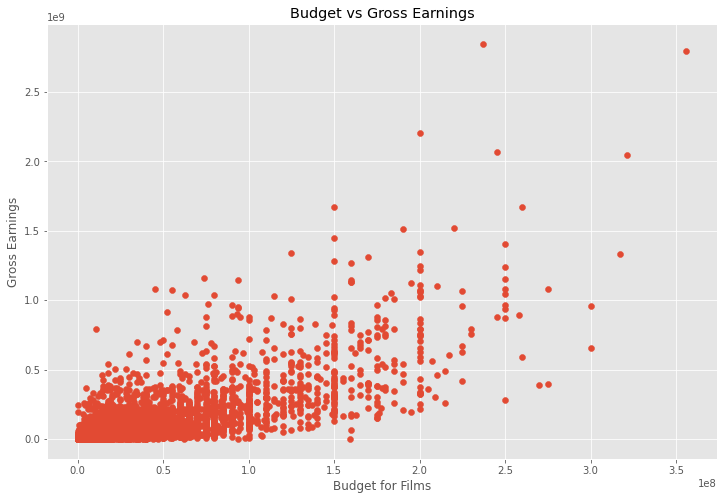

In [19]:
# Now that we have the data clean and shaped how we feel we'll need it . We are now going to test different hypothesis
# on which values/columns have the highest correlation to the highest grossing films.
# Lets do a scatter plot with budget vs gross


plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Films')
plt.ylabel('Gross Earnings')
plt.show()

# This scatter plot doesn't really show us what we were looking for. It shows some correlation,
# but with the vast majority of films having similar budgets, 
# a scatter plot wont show it properly. Lets try SeaBorn.

<AxesSubplot:xlabel='budget', ylabel='gross'>

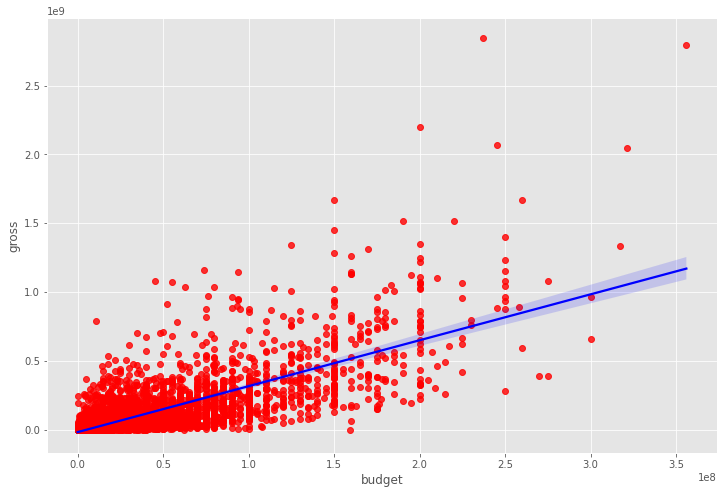

In [21]:
# We'll now plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross',data=df, scatter_kws = {"color": "red"}, line_kws = {"color":"blue"})

# We can see there is difinalty some correlation but how much corrlation is there compaired to othet columns.

In [25]:
# Lets start looking at tcorrelation

df.corr(method= 'pearson') #pearson(default), kendall, spearman

#Compaired to the other numeric columns the budget has the highest correlaion to gross being higher

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


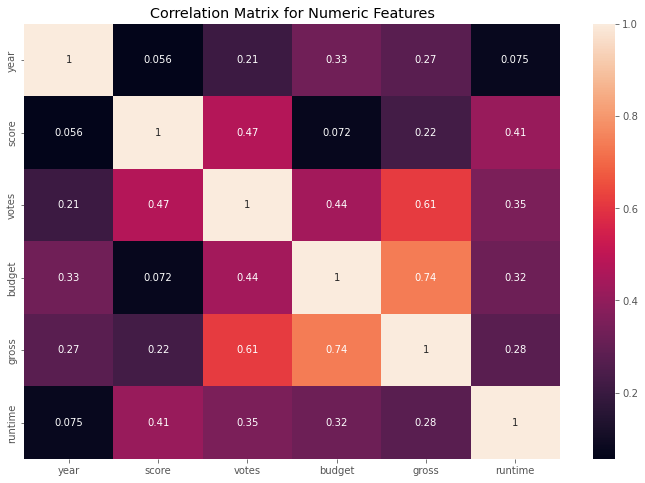

In [30]:
#Lets visualize the corr matrix
correlation_matrix = df.corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')

plt.show()

In [36]:
# Lets see if the company that made the movie has any correlation to the Gross
# In order to use the scatter plot we first have to numerize( not a real word i dont think lol)
# the categories that are object

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,Country
3731,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,29,47
5302,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,39,47
1795,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,17,47
4730,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,35,47
5158,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,38,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,35,41
1378,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,14,39
2286,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108,21,8
154,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85,2,47


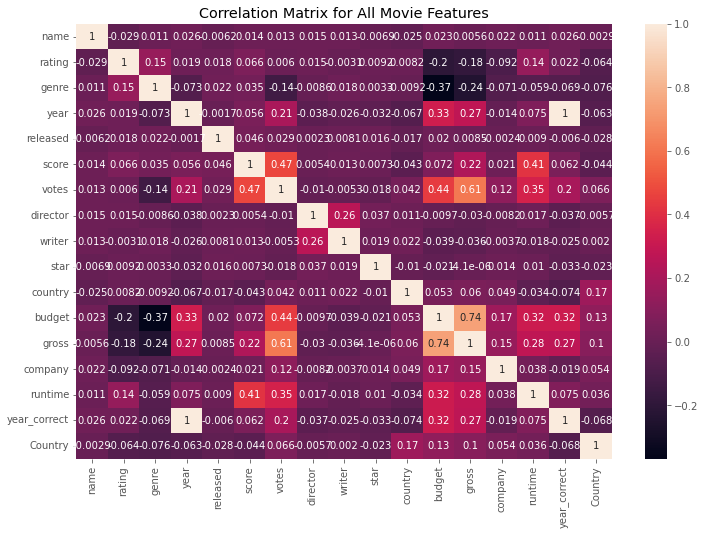

In [38]:
correlation_matrix = df_numerized.corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for All Movie Features')

plt.show()

In [44]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs)> .5]

high_corr

votes         gross           0.614751
gross         votes           0.614751
budget        gross           0.740247
gross         budget          0.740247
year_correct  year            0.998726
year          year_correct    0.998726
name          name            1.000000
writer        writer          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
year_correct  year_correct    1.000000
Country       Country         1.000000
dtype: float64

After analyzing the data I'm confident in saying Budget and Votes drive up the Gross more then any other stats about the Movie !